In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from sklearn.feature_extraction import image
from PIL import Image

In [2]:
def neighbors(img):

    right = np.vstack([img[:,:-1].ravel(), img[:,1:].ravel()])
    below = np.vstack([img[:-1,:].ravel(), img[1:,:].ravel()])
    neighbors = np.unique(np.hstack([right, below]), axis=1)

    return neighbors

In [9]:
def neighbors(img):

    right = np.vstack([img[:,:-1].ravel(), img[:,1:].ravel()])
    below = np.vstack([img[:-1,:].ravel(), img[1:,:].ravel()])
    neighbors = np.unique(np.hstack([right, below]), axis=1)

    return neighbors

def create_nxGraph(img):
    m,n = img.shape
    sigma = 3
    img_num = (np.arange(m*n).reshape(m,n))
    adj = neighbors(img_num)
    
    G = nx.Graph()
    G.add_nodes_from(np.arange(m*n))
    
    I = img.flatten()[adj[1]] - img.flatten()[adj[0]]
    weights = np.exp(-(np.abs(I))**2)
    weights = weights/(2*sigma**2)
    
    edges = zip(adj[0,:], adj[1,:], weights)
    G.add_weighted_edges_from(edges)
    nx.set_node_attributes(G, img.flatten(), "intensity")
    
    bool_img = img.astype(bool)
    mask = img_num[bool_img]
    
    return G.subgraph(mask)

/home/hiroshi/.pyenv/versions/python-3.7.9/lib/python3.7/site-packages/sklearn/manifold/_spectral_embedding.py:261: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  "Graph is not fully connected, spectral embedding may not work as expected."


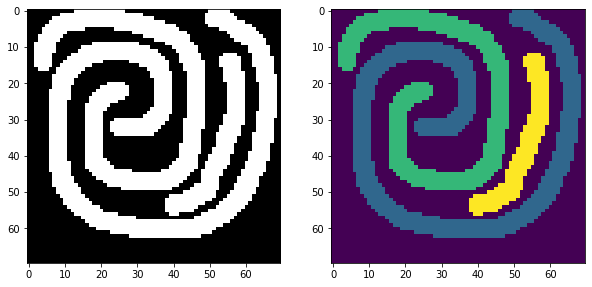

In [12]:
from sklearn.cluster import spectral_clustering
import matplotlib.pyplot as plt

img = Image.open('/home/hiroshi/2022-1/calcnum/spiral.png')
img = img.convert('L')#converte para grayscale
img = np.asarray(img)#converte para array

G = create_nxGraph(img)#cria o grafo
A = nx.to_numpy_array(G)#retorna a matriz de ajacencia
A = np.nan_to_num(A)#substitui infinitos

mask = img.astype(bool)#consideramos apenas os objetos
labels = spectral_clustering(A, n_clusters=3, eigen_solver="arpack")
label_im = np.full(mask.shape, -1.0)
label_im[mask] = labels

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
axs[0].imshow(img, 'gray')
axs[1].imshow(label_im)

plt.show()